In [1]:
import numpy as np
import matplotlib.pyplot as plt

### overleaf

In [2]:
txt = "54.84 ± 0.75 44.72 ± 0.50 50.37 ± 1.17"

x = txt.split(" ")

mean = [x[0], x[3], x[6]]
sd   = [x[2], x[5], x[8]]

mean = [float(x) for x in mean] 
sd   = [float(x) for x in sd] 

print(mean)
print(sd)

[54.84, 44.72, 50.37]
[0.75, 0.5, 1.17]


## Table - cifar10_iid_fedavg_pacing-f_pacing-a_0.2b_gloss

### pacing-f: linear, pacing-a: (0.1, 0.5, 0.8)

In [3]:
r01_av = [54.05, 50.21, 54.04]
r01_sd = [0.8, 1.02, 0.96]

r02_av = [54.92, 46.22, 52.38]
r02_sd = [1.01, 0.11, 1.12]

r03_av = [56.1, 44.44, 50.5]
r03_sd = [0.91, 0.75, 0.29]

### pacing-f: step, pacing-a: (0.1, 0.5, 0.8)

In [4]:
r04_av = [53.31, 50.64, 53.03]
r04_sd = [1.0, 0.45, 0.39]

r05_av = [54.4, 46.38, 50.06]
r05_sd = [1.26, 1.32, 0.84]

r06_av = [55.54, 41.51, 46.54]
r06_sd = [1.87, 0.78, 0.87]

### pacing-f: log, pacing-a: (0.1, 0.5, 0.8)

In [5]:
# r07_av = [52.69, 49.17, 51.85]
# r07_sd = [1.1, 0.65, 0.36]

# r08_av = [53.71, 48.81, 51.64]
# r08_sd = [0.7, 0.96, 1.15]

# r09_av = [54.21, 48.3, 51.61]
# r09_sd = [0.3, 0.5, 0.39]

### pacing-f: quad, pacing-a: (0.1, 0.5, 0.8)

In [6]:
r10_av = [53.58, 48.75, 52.71]
r10_sd = [0.76, 0.88, 1.52]

r11_av = [55.31, 47.11, 52.47]
r11_sd = [0.45, 1.65, 1.59]

r12_av = [56.36, 44.27, 51.05]
r12_sd = [0.41, 1.27, 0.14]

### pacing-f: exp, pacing-a: (0.1, 0.5, 0.8)

In [7]:
r13_av = [51.84, 48.89, 51.73]
r13_sd = [0.96, 1.07, 0.81]

r14_av = [55.28, 45.82, 50.49]
r14_sd = [2.58, 1.31, 1.39]

r15_av = [57.45, 43.48, 49.9]
r15_sd = [1.48, 1.2, 1.1]

### pacing-f: sqrt, pacing-a: (0.1, 0.5, 0.8)

In [8]:
r16_av = [53.76, 50.38, 52.98]
r16_sd = [1.64, 1.19, 0.99]

r17_av = [55.15, 47.92, 53.39]
r17_sd = [0.6, 1.38, 1.38]

r18_av = [54.84, 44.72, 50.37]
r18_sd = [0.75, 0.5, 1.17]

### combine table

In [9]:
# table_av = [r01_av, r02_av, r03_av, r04_av, r05_av, r06_av, r07_av, r08_av, r09_av, \
#             r10_av, r11_av, r12_av, r13_av, r14_av, r15_av, r16_av, r17_av, r18_av]
# table_sd = [r01_sd, r02_sd, r03_sd, r04_sd, r05_sd, r06_sd, r07_sd, r08_sd, r09_sd, \
#             r10_sd, r11_sd, r12_sd, r13_sd, r14_sd, r15_sd, r16_sd, r17_sd, r18_sd]
table_av = [r01_av, r02_av, r03_av, r04_av, r05_av, r06_av, \
            r10_av, r11_av, r12_av, r13_av, r14_av, r15_av, r16_av, r17_av, r18_av]
table_sd = [r01_sd, r02_sd, r03_sd, r04_sd, r05_sd, r06_sd, \
            r10_sd, r11_sd, r12_sd, r13_sd, r14_sd, r15_sd, r16_sd, r17_sd, r18_sd]

table_av = np.array(table_av)
table_sd = np.array(table_sd)

### table by ordering

In [10]:
table_curr_av = table_av[:, 0].reshape(5, 3)
table_curr_sd = table_sd[:, 0].reshape(5, 3)

table_anti_av = table_av[:, 1].reshape(5, 3)
table_anti_sd = table_sd[:, 1].reshape(5, 3)

table_rand_av = table_av[:, 2].reshape(5, 3)
table_rand_sd = table_sd[:, 2].reshape(5, 3)

## Plots

In [11]:
font = {'family': 'serif',
        'weight': 'normal',
        }
fontsize_axes   = 12 # axes fontsize
fontsize_legend = 11 # legend fontsize

x_label = ["0.1", "0.5", "0.8"]
# y_min   = 40
# y_max   = 60
# y_step  = 5

color_bar1 = 'darkturquoise'
color_bar2 = 'slateblue'
color_bar3 = 'palegreen'
color_bar4 = 'darkgrey'
color_bar5 = 'lightsalmon'

In [12]:
def make_fig_bar(mean, sd, y_min, y_max, y_step, name):
    
    fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
    N = 3
    ind = np.arange(N) 
    width = 0.15

    bar1 = ax.bar(ind, mean[0], yerr=sd[0], width=width, 
                  label="linear", color=color_bar1, capsize=3)
    
    bar2 = ax.bar(ind+width, mean[1], yerr=sd[1], width=width, 
                  label="step", color=color_bar2, capsize=3)
    
    bar3 = ax.bar(ind+width*2, mean[2], yerr=sd[2], width=width, 
                   label="quad", color=color_bar3, capsize=3)
    
    bar4 = ax.bar(ind+width*3, mean[3], yerr=sd[3], width=width, 
                   label="exp", color=color_bar4, capsize=3)
    
    bar5 = ax.bar(ind+width*4, mean[4], yerr=sd[4], width=width, 
                   label="sqrt", color=color_bar5, capsize=3)
    

    plt.xticks(ind+width*2, x_label)
    ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_axes, rotation=0)
    plt.ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
    ax.set_yticklabels(yticks, fontsize=fontsize_axes, fontdict=font, color='black')
    
    ax.set_xlabel(r'$\alpha$', fontsize=15, labelpad=2, fontdict=font)
    ax.set_ylabel('Accuracy', fontsize=15, labelpad=4, fontdict=font)

    ax.grid(visible=True, which='major', axis='y')
    plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", 
               mode="expand", borderaxespad=0, ncol=3, 
               fontsize=fontsize_legend)
    ax.margins(x=0.1)
    figure = plt.gcf()
    figure.set_size_inches(3.5, 2.5)
    plt.subplots_adjust(hspace = 0.01)
    fig.savefig('../figures/' + name + '_bar.eps', format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


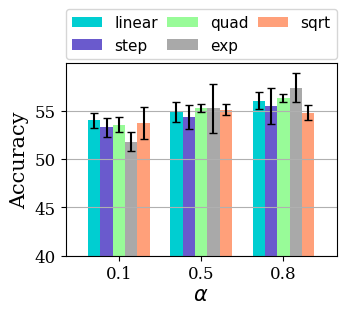

In [13]:
y_min   = 40
y_max   = 60
y_step  = 5

make_fig_bar(table_curr_av, table_curr_sd, y_min, y_max, y_step, 
             'cifar10_iid_fedavg_pacing-f_pacing-a_0.2b_gloss_curr')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


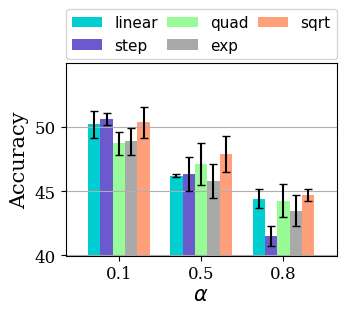

In [14]:
y_min   = 40
y_max   = 55
y_step  = 5

make_fig_bar(table_anti_av, table_anti_sd, y_min, y_max, y_step, 
             'cifar10_iid_fedavg_pacing-f_pacing-a_0.2b_gloss_anti')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


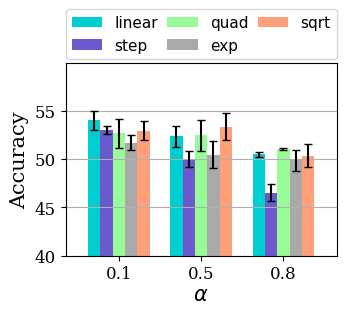

In [15]:
y_min   = 40
y_max   = 60
y_step  = 5

make_fig_bar(table_rand_av, table_rand_sd, y_min, y_max, y_step, 
             'cifar10_iid_fedavg_pacing-f_pacing-a_0.2b_gloss_rand')